In [1]:
import math
import matplotlib.pyplot as plt
import numpy

In [2]:
# Question 3 (Statistical Language Modeling)
# Loading vocab, unigram and bigram counts

tokens = []
with open('hw4_vocab.txt', 'r') as f:
    lines = f.readlines()
    tokens = [token.replace('\n','') for token in lines]

uniCounts = []
with open('hw4_unigram.txt', 'r') as f:
    lines = f.readlines()
    uniCounts = [int(count.replace('\n', '')) for count in lines]
    
biCounts = {}
with open('hw4_bigram.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        triplet = line.replace('\n', '').split('\t')
        biCounts[(int(triplet[0]), int(triplet[1]))] = int(triplet[2])

In [3]:
# Part A
unigramProbs = {}
totalCount = sum(uniCounts)
for i in range(0, len(tokens)):
    unigramProbs[tokens[i]] = uniCounts[i]/totalCount
    
for token in tokens:
    if(token[0] == 'M'):
        print(token, '\t', unigramProbs[token])

MILLION 	 0.002072759168154815
MORE 	 0.0017088989966186725
MR. 	 0.0014416083492816956
MOST 	 0.0007879173033190295
MARKET 	 0.0007803712804681068
MAY 	 0.0007298973156289532
M. 	 0.0007034067394618568
MANY 	 0.0006967290595970209
MADE 	 0.0005598610827336895
MUCH 	 0.0005145971758110562
MAKE 	 0.0005144626437991272
MONTH 	 0.00044490959363187093
MONEY 	 0.00043710673693999306
MONTHS 	 0.0004057607781605526
MY 	 0.0004003183467688823
MONDAY 	 0.00038198530259784006
MAJOR 	 0.00037089252670515475
MILITARY 	 0.00035204581485220204
MEMBERS 	 0.00033606096579846475
MIGHT 	 0.00027358919153183117
MEETING 	 0.0002657374141083427
MUST 	 0.0002665079156312084
ME 	 0.00026357267173457725
MARCH 	 0.0002597935452176646
MAN 	 0.0002528834918776787
MS. 	 0.0002389900041002911
MINISTER 	 0.00023977273580605944
MAKING 	 0.00021170446604452378
MOVE 	 0.0002099555498894477
MILES 	 0.00020596851026319035


In [4]:
# Part B
bigramProbs = {}
countOfBigramsGivenW1 = {}

for key in biCounts:
    if(key[0] in countOfBigramsGivenW1):
        countOfBigramsGivenW1[key[0]] = countOfBigramsGivenW1[key[0]] + biCounts[key]
    else:
        countOfBigramsGivenW1[key[0]] = biCounts[key]
    
for key in biCounts:    
    bigramProbs[(tokens[key[0]-1], tokens[key[1]-1])] = biCounts[key]/countOfBigramsGivenW1[key[0]]
    
likelyWordsAfterTHE = []

for key in bigramProbs:
    if(key[0] == "THE"):
        likelyWordsAfterTHE.append((bigramProbs[key], key[1]))
        
likelyWordsAfterTHE.sort(reverse=True)
print(likelyWordsAfterTHE[:10])

[(0.6150198100055118, '<UNK>'), (0.013372499432610317, 'U.'), (0.011720260675031612, 'FIRST'), (0.011658788055636611, 'COMPANY'), (0.009451480076516552, 'NEW'), (0.008672308141231398, 'UNITED'), (0.006803488635995202, 'GOVERNMENT'), (0.006650714911000876, 'NINETEEN'), (0.006287066757449016, 'SAME'), (0.006160749602827221, 'TWO')]


In [5]:
#Function to compute log likelihood under the unigram model
def UnigramLogLikelihood(sentence):
    words = sentence.upper().split(' ')
    likelihood = 0.0
    
    for word in words:
        likelihood = likelihood + math.log(unigramProbs[word])
        
    return likelihood

#Function to compute log likelihood under the bigram model
def BigramLogLikelihood(sentence):
    words = sentence.upper().split(' ')
    likelihood = 0.0
    
    for i in range(0, len(words)):
        if(i==0):
            try:
                likelihood = likelihood + math.log(bigramProbs.get(("<s>", words[i]), 0))
            except:
                print("<s> and ", words[i], " don't appear together")
                likelihood = -numpy.inf
        else:
            try:
                likelihood = likelihood + math.log(bigramProbs.get((words[i-1], words[i]), 0))
            except:
                print(words[i-1], " and ", words[i], " don't appear together")
                likelihood = -numpy.inf
            
    return likelihood

#Function to compute log likelihood under the mixture model
def MixLogLikelihood(sentence, lambdaParam):
    words = sentence.upper().split(' ')
    likelihood = 0.0
    
    for i in range(0, len(words)):
        if(i==0):
            mixProb = lambdaParam*unigramProbs[words[i]] + (1-lambdaParam)*bigramProbs.get(("<s>", words[i]), 0)
            likelihood = likelihood + math.log(mixProb)
        else:
            mixProb = lambdaParam*unigramProbs[words[i]] + (1-lambdaParam)*bigramProbs.get((words[i-1], words[i]), 0)
            likelihood = likelihood + math.log(mixProb)
        
    return likelihood

In [6]:
# Part C
sentence = "The stock market fell by one hundred points last week"

print("Log-Likelihood under unigram model ", UnigramLogLikelihood(sentence))
print("Log-Likelihood under bigram model ", BigramLogLikelihood(sentence))

Log-Likelihood under unigram model  -64.50944034364878
Log-Likelihood under bigram model  -40.91813213378977


In [7]:
# Part D
sentence = "The sixteen officials sold fire insurance"

print("Log-Likelihood under unigram model ", UnigramLogLikelihood(sentence))
print("Log-Likelihood under bigram model ", BigramLogLikelihood(sentence))
# 2 bigrams not present

Log-Likelihood under unigram model  -44.291934473132606
SIXTEEN  and  OFFICIALS  don't appear together
SOLD  and  FIRE  don't appear together
Log-Likelihood under bigram model  -inf


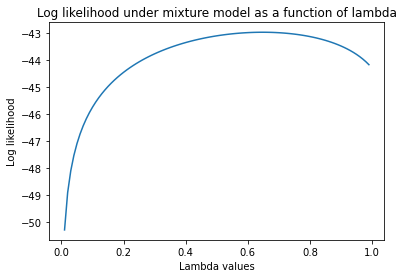

In [8]:
# Part E
lambdaValues = []
x = 0.01

while(x <= 1.0):
    lambdaValues.append(x)
    x = x + 0.01
    
mixProbValues = []
sentence = "The sixteen officials sold fire insurance"

for lambdaVal in lambdaValues:
    mixProbValues.append(MixLogLikelihood(sentence, lambdaVal))
    
plt.plot(lambdaValues, mixProbValues)
plt.title('Log likelihood under mixture model as a function of lambda')
plt.xlabel('Lambda values')
plt.ylabel('Log likelihood')
plt.savefig('Q3E_Plot.png')
plt.show()
plt.close()

In [9]:
print("Optimal value of lambda ", lambdaValues[numpy.argmax(mixProbValues)])

Optimal value of lambda  0.6500000000000004
